In [9]:
import numpy as np
import matplotlib.pyplot as plt

import model as m
import model_1 as m1

In [10]:
theta = np.load('datfiles/theta_star.npy')

In [11]:
mu = np.vstack(m.azr.predict(theta, dress_up=False))

In [12]:
mu1 = np.vstack(m1.azr.predict(theta, dress_up=False))

In [13]:
np.linalg.norm(mu - mu1)

0.0

In [14]:
mup = m1.calculate_new(theta)

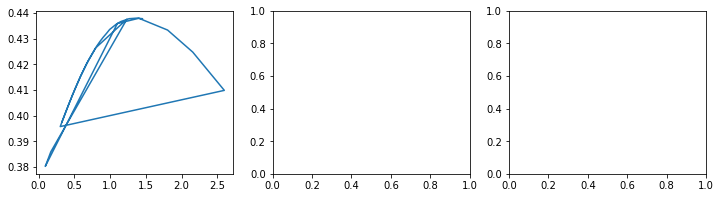

In [15]:
fig, ax = plt.subplots(ncols=3, figsize=(3*4, 3))
fig.patch.set_facecolor('white')

ax[0].plot(m1.x[:m1.nbr], mup[:m1.nbr]);



In [13]:
def predict(theta, model):
    return np.vstack(model.azr.predict(theta, dress_up=False))

def diff(theta):
    return np.linalg.norm(predict(theta, m) - predict(theta, m1))

In [14]:
diff(theta)

0.0

In [15]:
chain = np.load('datfiles/posterior_chain.npy')
chain.shape

(1000, 32)

In [16]:
from tqdm import tqdm

In [18]:
differences = np.array([diff(theta) for theta in tqdm(chain)])


 15%|█▌        | 152/1000 [02:56<16:29,  1.17s/it]


 30%|███       | 303/1000 [05:48<12:41,  1.09s/it]


 45%|████▌     | 454/1000 [08:34<10:09,  1.12s/it]


 60%|██████    | 605/1000 [11:03<03:20,  1.97it/s]


 76%|███████▌  | 756/1000 [15:21<04:34,  1.13s/it]


 91%|█████████ | 907/1000 [18:16<01:48,  1.17s/it]


100%|██████████| 1000/1000 [19:10<00:00,  1.15s/it]


In [20]:
np.any(differences != 0)

False